# AllLife Credit Card Customer Segmentation


## Background

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Key Questions

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

## Github Link

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import itertools as it
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

from scipy.stats import zscore

from scipy.spatial.distance import cdist, pdist

from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

%matplotlib inline

# Increase cell width
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update seaborn default style
sns.set_style("ticks")
sns.set_context("notebook")

my_random_state = 5

## Read Data

In [3]:
credit_card_orig_df = pd.read_excel("Credit Card Customer Data.xlsx")

In [4]:
print("")
print("Credit Card Customer Data")
print("*************************")
print("")
display(HTML(credit_card_orig_df.head(10).to_html()))


Credit Card Customer Data
*************************



## Datatypes and Description

In [5]:
print("")
print("Credit Card Customer Data -- Info")
print(credit_card_orig_df.info())


Credit Card Customer Data -- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None


##### Observation
* dataset have **660 entries**
* dataset has **7 attributes**
* all attributes are of type int
* There are no null values in terms of missing values or NaN for any of the columns

#### Description

Based on the problem statement, the description of the columns are

----

<pre>
<b>Sl_No</b>                Serial Number for the entry
<b>Customer Key</b>         The customer key, to uniquely identify the customer
<b>Avg_Credit_Limit</b>     The average line of credit for the customer across their credit cards
<b>Total_Credit_Cards</b>   Total number of credit cards for the customer with the bank
<b>Total_visits_bank</b>    Total number of bank visits by the customer for queries
<b>Total_visits_online</b>  Total number of online visits by the customer for queries
<b>Total_calls_made</b>     Total number of calls made by the customer for queries
</pre>

----

##### Observation
* Based on the description, the datatypes matches

#### Shape

In [6]:
print("")
print("Credit Card Customer Data -- Shape")
print(credit_card_orig_df.shape)


Credit Card Customer Data -- Shape
(660, 7)


## Summary of Data

In [7]:
credit_card_df = credit_card_orig_df.copy()

# Since we are looking for customer segmentation, we neednt have to worry about Sl_No and Customer Key and remove them beforehand
credit_card_df.drop(["Sl_No", "Customer Key"], axis=1, inplace=True)

In [8]:
print("")
print("Credit Card Customer Data -- Describe")
display(HTML(credit_card_df.describe().T.to_html()))


Credit Card Customer Data -- Describe


## Univariate Analysis


********************************************************* Analysis of : Avg_Credit_Limit *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 3000
Max                                 : 200000
Range                               : 197000.00
--------------
Mean                                : 34574.24
Median                              : 18000.00
Std Dev                             : 37625.49
Skew                                : 2.20 (positive skew)
--------------
Q1 (1st Quartile)                   : 10000.0
Q3 (3rd Quartile)                   : 48000.0
IQR                                 : 38000.00
------- Outliers using IQR -------
Lower whisker                       : -47000.00
Upper whisker                       : 105000.00
Number of lower outliers            : 0
Number of upper outliers            : 39
% of the lower outliers, in dataset : 0.00%
% 

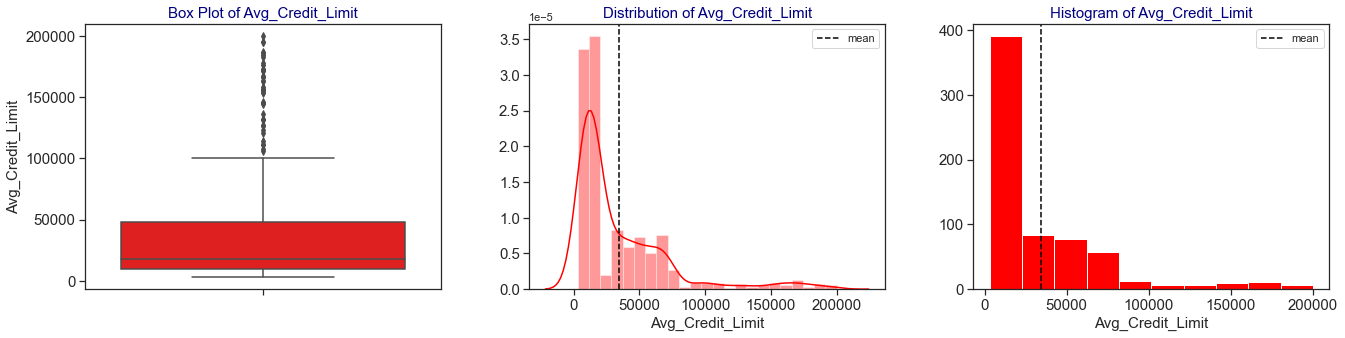


*************************************************************************************************************************************

********************************************************* Analysis of : Total_Credit_Cards *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 1
Max                                 : 10
Range                               : 9.00
--------------
Mean                                : 4.71
Median                              : 5.00
Std Dev                             : 2.17
Skew                                : 0.14 (positive skew)
--------------
Q1 (1st Quartile)                   : 3.0
Q3 (3rd Quartile)                   : 6.0
IQR                                 : 3.00
------- Outliers using IQR -------
Lower whisker                       : -1.50
Upper whisker                       : 10.50
Number of lower outliers          

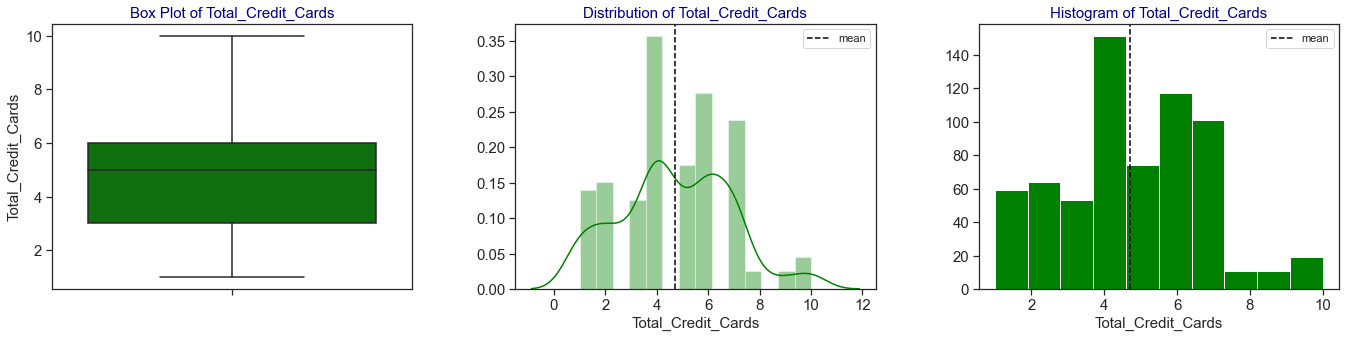


*************************************************************************************************************************************

********************************************************* Analysis of : Total_visits_bank *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 0
Max                                 : 5
Range                               : 5.00
--------------
Mean                                : 2.40
Median                              : 2.00
Std Dev                             : 1.63
Skew                                : 0.14 (positive skew)
--------------
Q1 (1st Quartile)                   : 1.0
Q3 (3rd Quartile)                   : 4.0
IQR                                 : 3.00
------- Outliers using IQR -------
Lower whisker                       : -3.50
Upper whisker                       : 8.50
Number of lower outliers            :

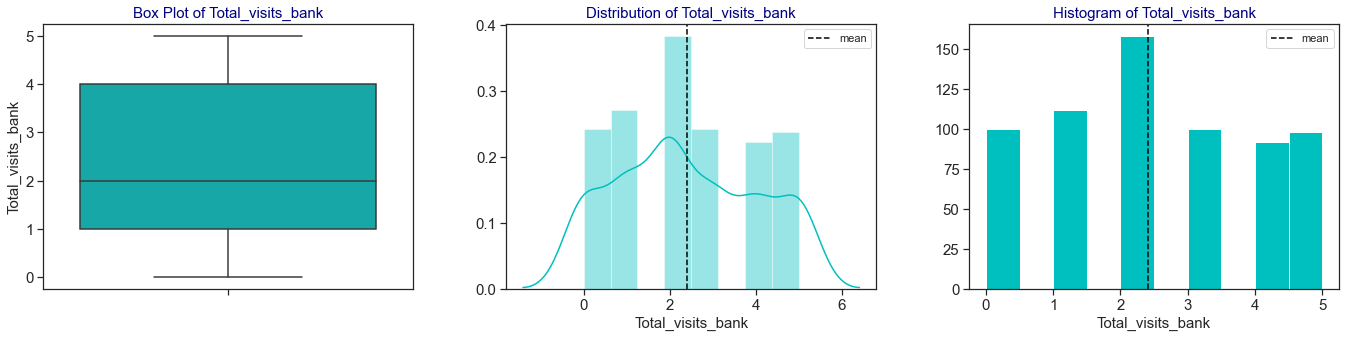


*************************************************************************************************************************************

********************************************************* Analysis of : Total_visits_online *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 0
Max                                 : 15
Range                               : 15.00
--------------
Mean                                : 2.61
Median                              : 2.00
Std Dev                             : 2.94
Skew                                : 2.23 (positive skew)
--------------
Q1 (1st Quartile)                   : 1.0
Q3 (3rd Quartile)                   : 4.0
IQR                                 : 3.00
------- Outliers using IQR -------
Lower whisker                       : -3.50
Upper whisker                       : 8.50
Number of lower outliers         

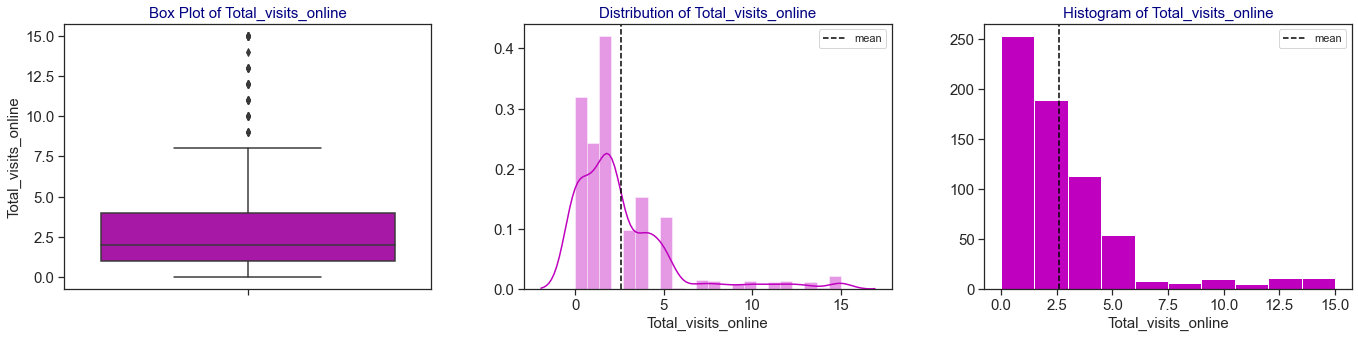


*************************************************************************************************************************************

********************************************************* Analysis of : Total_calls_made *********************************************************

Null Values?                        : False
Na Values?                          : False
Min                                 : 0
Max                                 : 10
Range                               : 10.00
--------------
Mean                                : 3.58
Median                              : 3.00
Std Dev                             : 2.87
Skew                                : 0.66 (positive skew)
--------------
Q1 (1st Quartile)                   : 1.0
Q3 (3rd Quartile)                   : 5.0
IQR                                 : 4.00
------- Outliers using IQR -------
Lower whisker                       : -5.00
Upper whisker                       : 11.00
Number of lower outliers           

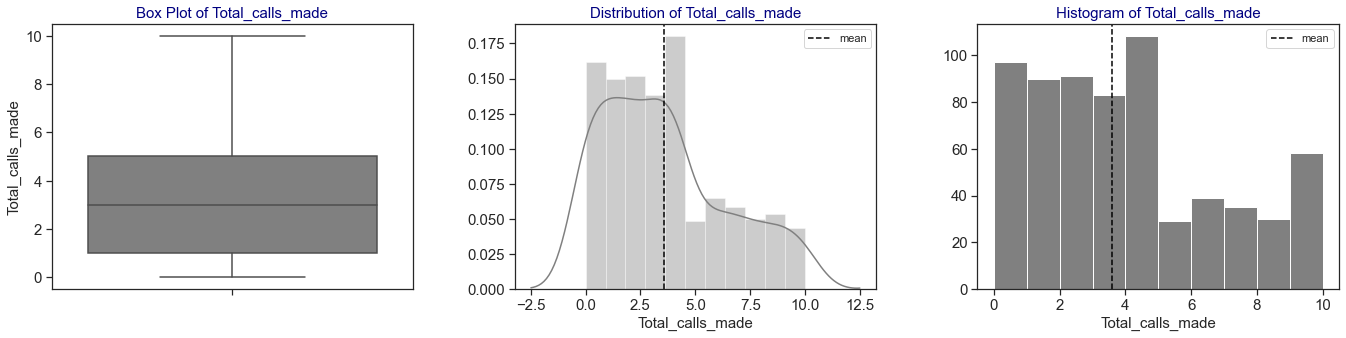


*************************************************************************************************************************************


In [9]:
cols_colors = ["r","g","c","m","grey"]
cols_length = len(credit_card_df.columns)

for column, index, color in it.zip_longest(credit_card_df.columns, range(cols_length), cols_colors):
    print("")
    print("********************************************************* Analysis of : {0} *********************************************************".format(column))
    print("")
    minimum = credit_card_df[column].min()
    maximum = credit_card_df[column].max()
    min_max_range = maximum - minimum
    
    # Find the null/na values, min, max and range of the values
    print("Null Values?                        : {}".format(credit_card_df[column].isnull().any()))
    print("Na Values?                          : {}".format(credit_card_df[column].isna().any()))
    print("Min                                 : {}".format(minimum))
    print("Max                                 : {}".format(maximum))
    print("Range                               : {0:0.2f}".format(min_max_range))
    print("--------------")
    
    # Find the mean, median and std. dev
    print("Mean                                : {0:0.2f}".format(credit_card_df[column].mean()))
    print("Median                              : {0:0.2f}".format(credit_card_df[column].median()))
    print("Std Dev                             : {0:0.2f}".format(credit_card_df[column].std()))
    col_skew = credit_card_df[column].skew()
    
    # Find the skew
    col_skew_str = "positive skew" if col_skew > 0 else "negative skew"
    print("Skew                                : {0:0.2f} ({1})".format(col_skew, col_skew_str))
    print("--------------")
    q1 = credit_card_df[column].quantile(q=0.25)
    q3 = credit_card_df[column].quantile(q=0.75)
    iqr = q3 - q1
    
    # Find the outliers
    print("Q1 (1st Quartile)                   : {}".format(q1))
    print("Q3 (3rd Quartile)                   : {}".format(q3))
    print("IQR                                 : {0:0.2f}".format(iqr))
    print("------- Outliers using IQR -------")
    lower_whisker = q1 - 1.5 * (iqr)
    upper_whisker = q3 + 1.5 * (iqr)
    print("Lower whisker                       : {0:0.2f}".format(lower_whisker))
    print("Upper whisker                       : {0:0.2f}".format(upper_whisker))
    num_below_lower = credit_card_df[credit_card_df[column] < lower_whisker][column].count()
    num_above_upper = credit_card_df[credit_card_df[column] > upper_whisker][column].count()
    perc_below_lower = (num_below_lower / len(credit_card_df)) * 100
    perc_above_upper = (num_above_upper / len(credit_card_df)) * 100
    print("Number of lower outliers            : {}".format(num_below_lower))
    print("Number of upper outliers            : {}".format(num_above_upper))
    print("% of the lower outliers, in dataset : {0:0.2f}%".format(perc_below_lower))
    print("% of the upper outliers, in dataset : {0:0.2f}%".format(perc_above_upper))
    print("")
    

    fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6), edgecolor='k')

    #boxplot
    sns.boxplot(x=column,data=credit_card_df,orient='v',ax=ax1, color=color)
    ax1.set_ylabel(column, fontsize=15)
    ax1.set_title('Box Plot of {}'.format(column), fontsize=15, color="navy")
    ax1.tick_params(labelsize=15)

    #distplot
    sns.distplot(credit_card_df[column],ax=ax2, color=color)
    ax2.axvline(credit_card_df[column].mean(),linestyle="dashed",label="mean",color="k")
    ax2.legend(loc="best")
    ax2.set_xlabel(column, fontsize=15)
    ax2.set_title('Distribution of {}'.format(column), fontsize=15, color="navy")
    ax2.tick_params(labelsize=15)

    #histogram
    ax3.hist(credit_card_df[column], color=color)
    ax3.axvline(credit_card_df[column].mean(),linestyle="dashed",label="mean",color="k")
    ax3.legend(loc="best")
    ax3.set_xlabel(column, fontsize=15)
    ax3.set_title('Histogram of {}'.format(column), fontsize=15, color="navy")
    ax3.tick_params(labelsize=15)

    plt.tight_layout(pad=4.5)
    plt.show();

    print("")
    
    print("*************************************************************************************************************************************")

##### Observation

* **Null Values** - None of the attributes have null or missing values.
* **Missing Values** - There doesnt seem to be any missing values. Values of 0 for **Total_visits_bank**, **Total_visits_online** and **Total_calls_made** are valid values.
* **Outliers** - *Avg_Credit_Limit* and *Total_visits_online* have outliers
<br><br>
* **Avg_Credit_Limit** - We see 4 gaussians with postive skew and long tail. We also see couple of outliers, showing few customers have higher credit limits compared to others.
* **Total_Credit_Cards** - We see 4 gaussians with slight postive skew. No outliers.
* **Total_visits_bank** - We see around 3 gaussians with slight positive skew. No outliers.
* **Total_visits_online** - We see around 3 gaussians with positive skew and long tail. We do see a couple of outliers, showing some customers had more online visits for their queries, as compared to others. This might be because it is easier to reach out online for any questions rather than calling or visiting the bank in person
* **Total_calls_made** - We see around 2 gaussians with slight positive skew and no outliers. Calls seems to be the second best option for customers to reach the bank for their queries after online option.
<br><br>
* Based on the data above, we see that we have atleast 3 to 4 segments of customers. So we should try to cluster them and observe the patterns

## Bivariate Analysis

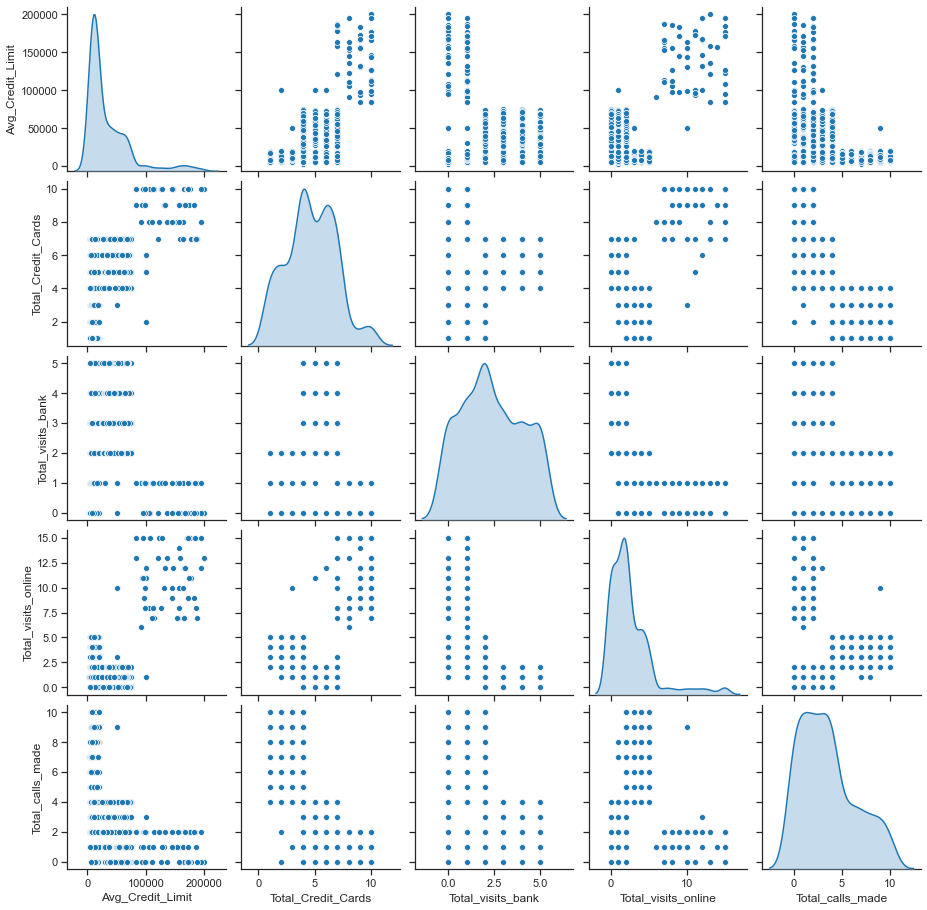

In [10]:
sns.pairplot(credit_card_df,diag_kind='kde')
plt.show();

##### Observation

* **Avg_Credit_Limit**
    * Has slight positive relationship with *Total_Credit_Cards* and *Total_visits_online*
    * Customers with high avg credit limit make lesser trips to the bank and lesser phone calls. But they call the bank more often.
* **Total_Credit_Cards**
    * Has slight positive relationship with *Total_visits_online*
* **Total_visits_bank**
    * No noticable relationship
* **Total_visits_online**
    * Has slight positive relationship with *Avg_Credit_Limit* and *Total_Credit_Cards*
* **Total_calls_made**
    * No noticable relationship

### Correlation Matrix

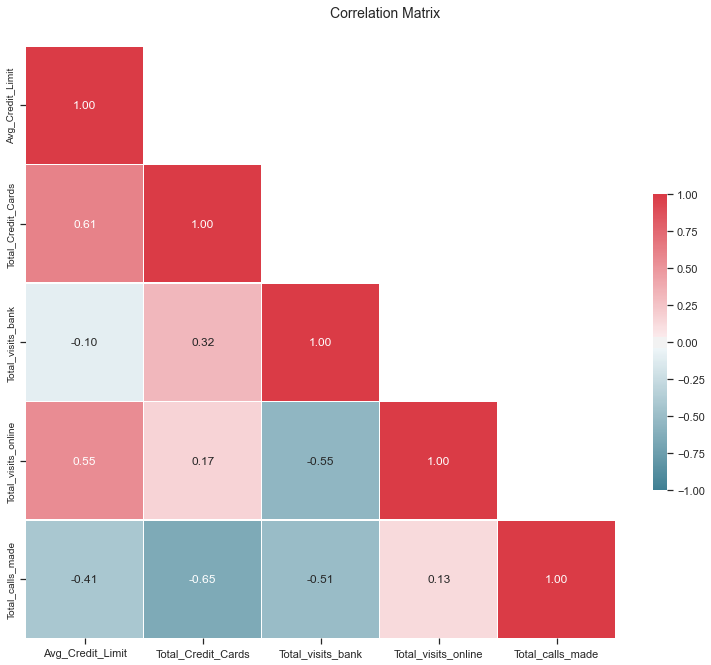

In [11]:
# Graphical representation of the correlation
correlation = credit_card_df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig_corr, axes_corr = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

# Hide the upper half of the matrix - So that we see the values only once
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(correlation, ax=axes_corr,  linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap, vmin=-1, annot=True, fmt=".2f", mask=mask)
fig_corr.suptitle("Correlation Matrix", fontsize=14)
plt.yticks(fontsize=10, va="center")
fig_corr.tight_layout(pad=4.5)
plt.show();

##### Observation

* **Avg_Credit_Limit**
    * Has slight positive correlation with *Total_Credit_Cards* and *Total_visits_online* (Customers with Higher Avg_Credit_Limit have Higher Total_Credit_Cards and Higher Total_visits_online)
    * Has slight negative correlation with *Total_calls_made* (Customers with Higher Avg_Credit_Limit have lower Total_calls_made)
* **Total_Credit_Cards**
    * Has slight positive correlation with *Total_visits_bank* and *Total_visits_online* (Customers with Higher Total_Credit_Cards have Higher Total_visits_online)
    * Has slight negative correlation with *Total_calls_made* (Customers with Higher Total_Credit_Cards have lower Total_calls_made)
* **Total_visits_bank**
    * Has slight negative correlation with *Total_visits_online* and *Total_calls_made*, showing customers visiting banks in person are less likely to visit the bank online or call them

### Total Credit Cards vs Avg Credit Limit

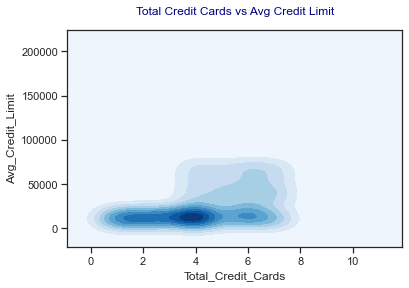

In [12]:
# Plot a density plot of the number of credit cards vs credit limit

ax = sns.kdeplot(credit_card_df["Total_Credit_Cards"], credit_card_df["Avg_Credit_Limit"], cmap="Blues", shade=True)
ax.set_title("Total Credit Cards vs Avg Credit Limit", pad=15, color="navy")
plt.show();

##### Observation
* We see a larger density of customers having 4 credit cards and avg credit limit of around 2000

### Avg Credit Limit vs Bank Visits, Online Visits and Total Calls Made

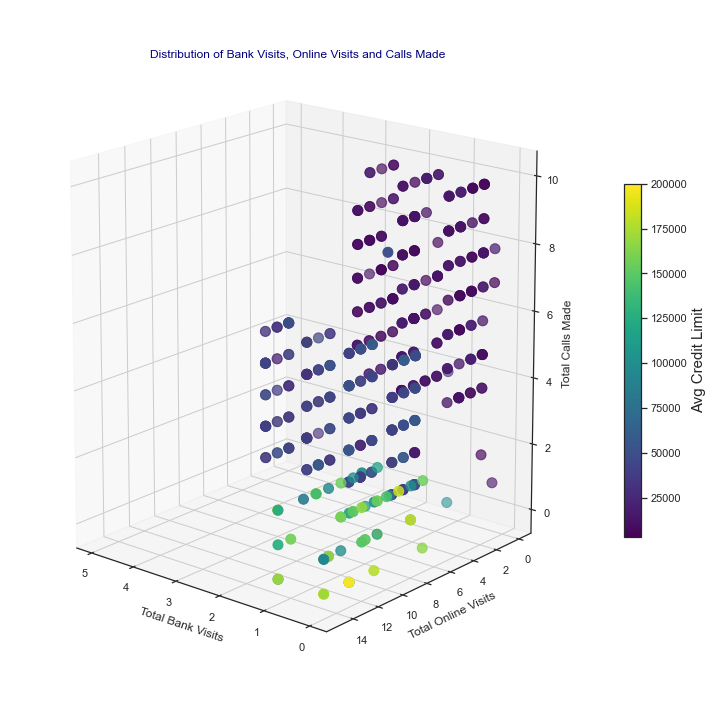

In [13]:
# Plot a 3D space graph of all the possible visits and the avg credit limit
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(credit_card_df['Total_visits_bank'], credit_card_df['Total_visits_online'], credit_card_df['Total_calls_made'], c=credit_card_df["Avg_Credit_Limit"], s=100, cmap="viridis")
ax.view_init(15, 130)
ax.set_xlabel("Total Bank Visits")
ax.set_ylabel("Total Online Visits")
ax.set_zlabel("Total Calls Made")
lab = fig.colorbar(scatter, shrink=.5)
lab.set_label("Avg Credit Limit",fontsize = 15)
plt.title("Distribution of Bank Visits, Online Visits and Calls Made",color="navy")
plt.show();

##### Observation

* Customers with higher avg credit limit, make lesser trips to the bank (1 or 2)
* Customers with higher avg credit limit, make more online visits
* Customers with lower avg credit limit, make lesser phone calls
* Customers with medium avg credit limit, make more frequent trips to the bank

## Standardize Data

Since *Avg_Credit_Limit* and *Total_Credit_Cards* are of different scale compared to other attributes, we will standardize the data

In [14]:
# Standardize data based on zscore
credit_card_scaled_df = credit_card_df.apply(zscore)

In [15]:
display(HTML(credit_card_scaled_df.head(10).to_html()))

## K-mean Clustering

In [16]:
# Make local copies of the dataframe
credit_card_kmeans_df = credit_card_df.copy()
credit_card_scaled_kmeans_df = credit_card_scaled_df.copy()

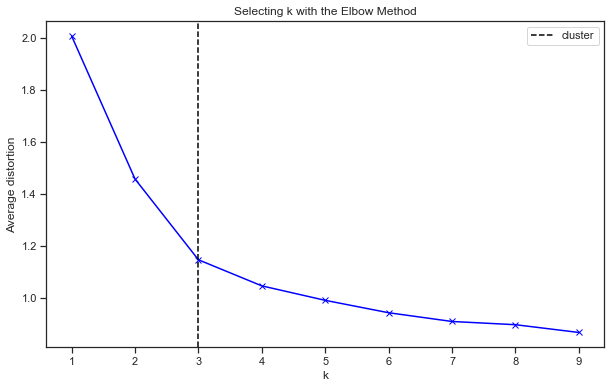

In [17]:
# Find distortion for various cluster sizes to find out the optimal cluster size
# Lets look at cluster size 1-10
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(credit_card_scaled_kmeans_df)
    prediction=model.predict(credit_card_scaled_kmeans_df)
    # Find the mean distortion for each cluster
    meanDistortions.append(sum(np.min(cdist(credit_card_scaled_kmeans_df, model.cluster_centers_, 'euclidean'), axis=1)) / credit_card_scaled_kmeans_df.shape[0])

# Plot the distortions for each cluster size, to make an elbow plot
fig, ax1=plt.subplots(1, 1, figsize=(10,6), edgecolor='k')

ax1.plot(clusters, meanDistortions, 'bx-')
ax1.axvline(3,linestyle="dashed",label="cluster",color="k")
ax1.set_xlabel('k')
ax1.set_ylabel('Average distortion')
ax1.legend(loc="best")
ax1.set_title('Selecting k with the Elbow Method')

plt.show();

##### Observation

* When cluster size is **3** we notice the elbow bend. So we will choose cluster size as 3 for futher analysis

In [18]:
# With cluster size as 3, find the labels

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = my_random_state)
kmeans.fit(credit_card_scaled_kmeans_df)

KMeans(n_clusters=3, random_state=5)

In [19]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[224 386  50]


In [20]:
# Except for Group 2, the distribution seems ok

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(credit_card_scaled_kmeans_df) )
centroid_df.transpose()

0         1         2
Avg_Credit_Limit    -0.595796 -0.021062  2.831764
Total_Credit_Cards  -1.059623  0.373690  1.862226
Total_visits_bank   -0.901518  0.666395 -1.105763
Total_visits_online  0.322997 -0.553672  2.827319
Total_calls_made     1.148109 -0.553005 -0.874330

##### Observation

* Conclusion
    * **Group 0** - High Total_calls_made. Low Avg_Credit_Limit, Total_Credit_Cards
    * **Group 1** - High Total_visits_bank. Low Total_visits_online
    * **Group 2** - High Avg_Credit_Limit, Total_Credit_Cards, Total_visits_online. Low Total_visits_bank, Total_calls_made

In [21]:
# Add group to original data

kmeans_predictions = kmeans.predict(credit_card_scaled_kmeans_df)
credit_card_kmeans_df["Group"] = kmeans_predictions
credit_card_scaled_kmeans_df["Group"] = kmeans_predictions
credit_card_kmeans_df['Group'] = credit_card_kmeans_df['Group'].astype('category')
credit_card_scaled_kmeans_df['Group'] = credit_card_scaled_kmeans_df['Group'].astype('category')

credit_card_kmeans_df.dtypes

Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
Group                  category
dtype: object

In [22]:
# Lets look at the value counts
credit_card_kmeans_df['Group'].value_counts()  

1    386
0    224
2     50
Name: Group, dtype: int64

In [23]:
# Check the clusters in 3d space, to get a better sense of the clustering

import plotly.express as px
fig = px.scatter_3d(credit_card_kmeans_df, x='Total_visits_bank', y='Total_visits_online', z='Total_calls_made',color='Group', labels={"Total_visits_bank":"In Person", "Total_visits_online":"Online", "Total_calls_made":"Calls"})
fig.show();

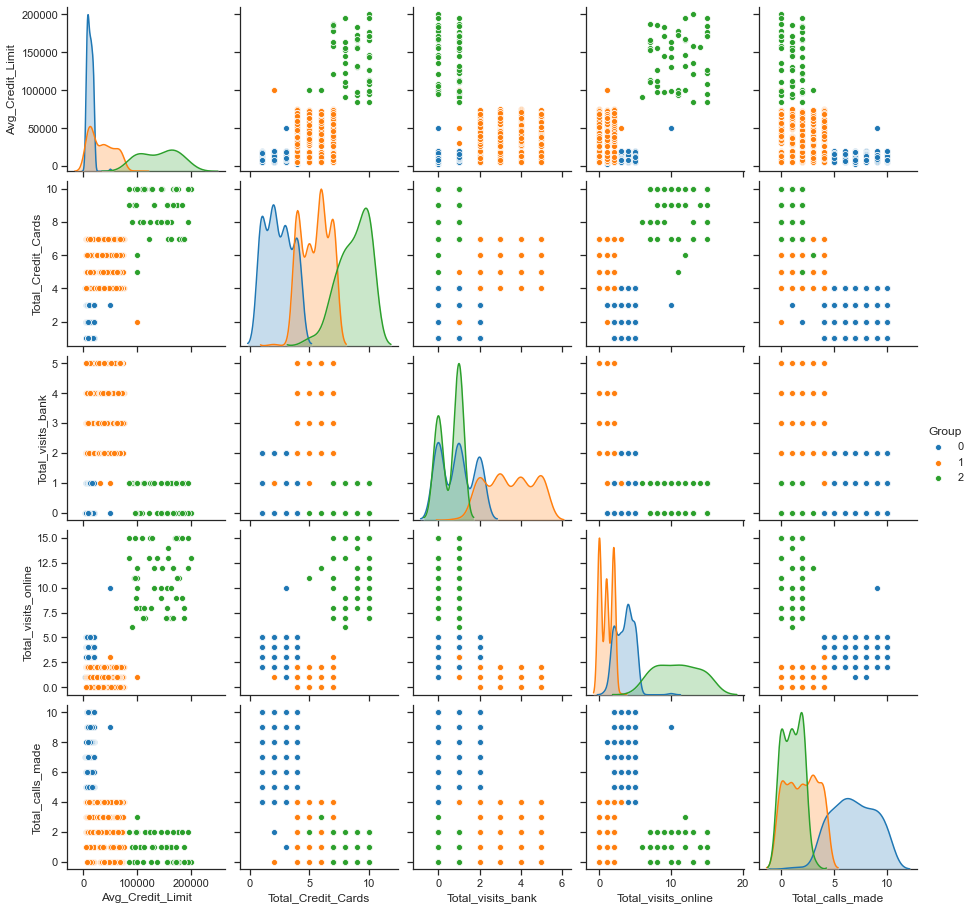

In [24]:
# Lets check the pairplot taking into consideration the new labels

sns.pairplot(credit_card_kmeans_df,hue="Group")
plt.show();

##### Observation

* We observe that the groups offer a good segmentation of the customers.

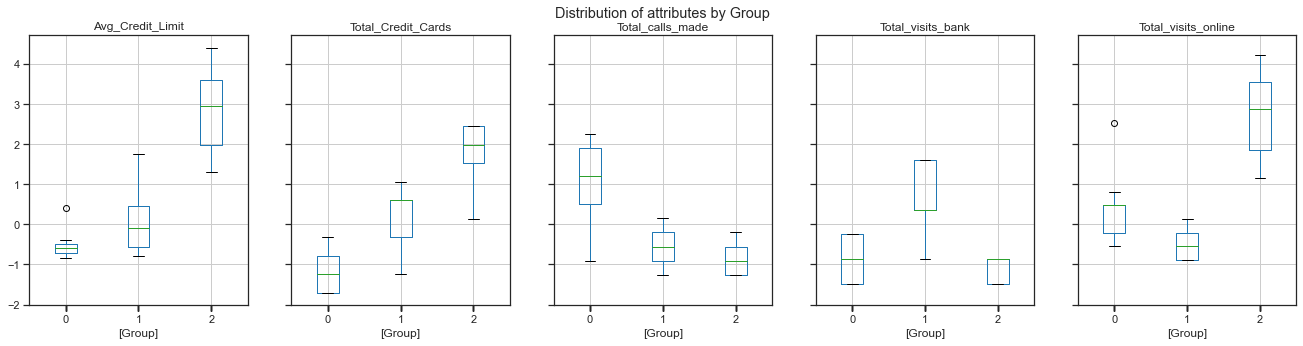

In [25]:
# Lets look at the boxplots to find the distributions of the attributes in each group

credit_card_scaled_kmeans_df.boxplot(by = 'Group',  layout=(1,5), figsize=(22, 5))
plt.suptitle("Distribution of attributes by Group")
plt.show();

##### Observation

**Legend** : ( ⬆ - Most&nbsp;&nbsp;&nbsp;&nbsp;⇩ - Less&nbsp;&nbsp;&nbsp;&nbsp;⬇ - Least )

Customer segements are:

* **Group 0**
    * ⬆ Calls to bank
    * ⇩ Visit Bank
    * ⇩ Visit Online
    * ⬇ Average credit limit
    * ⬇ Number of credit cards

* **Group 1**
    * ⇩ Calls to bank
    * ⬆ Visit Bank
    * ⬇ Visit Online
    * ⇩ Average credit limit
    * ⇩ Number of credit cards

* **Group 2**
    * ⬇ Calls to bank
    * ⬇ Visit Bank
    * ⬆ Visit Online
    * ⬆ Average credit limit
    * ⬆ Number of credit cards

In [26]:
# Create a dataframe with the observation for future analysis

kmeans_result = {
    "Group": ["Group 0", "Group 1", "Group 2"],
    "Avg Credit Limit": ["Least", "Less", "Most"],
    "Number of Credit Cards": ["Least", "Less", "Most"],
    "Call": ["Most", "Less", "Least"],
    "Visit Bank": ["Less", "Most", "Least"],
    "Visit Online": ["Less", "Least", "Most"]
}
kmeans_result_df = pd.DataFrame(kmeans_result).set_index("Group")

## Hierarchical Clustering

In [27]:
credit_card_hierarchical_df = credit_card_df.copy()
credit_card_scaled_hierarchical_df = credit_card_scaled_df.copy()


********************************************************* Method : single *********************************************************

Cophenetic Coeff                                 : 0.7391220243806552


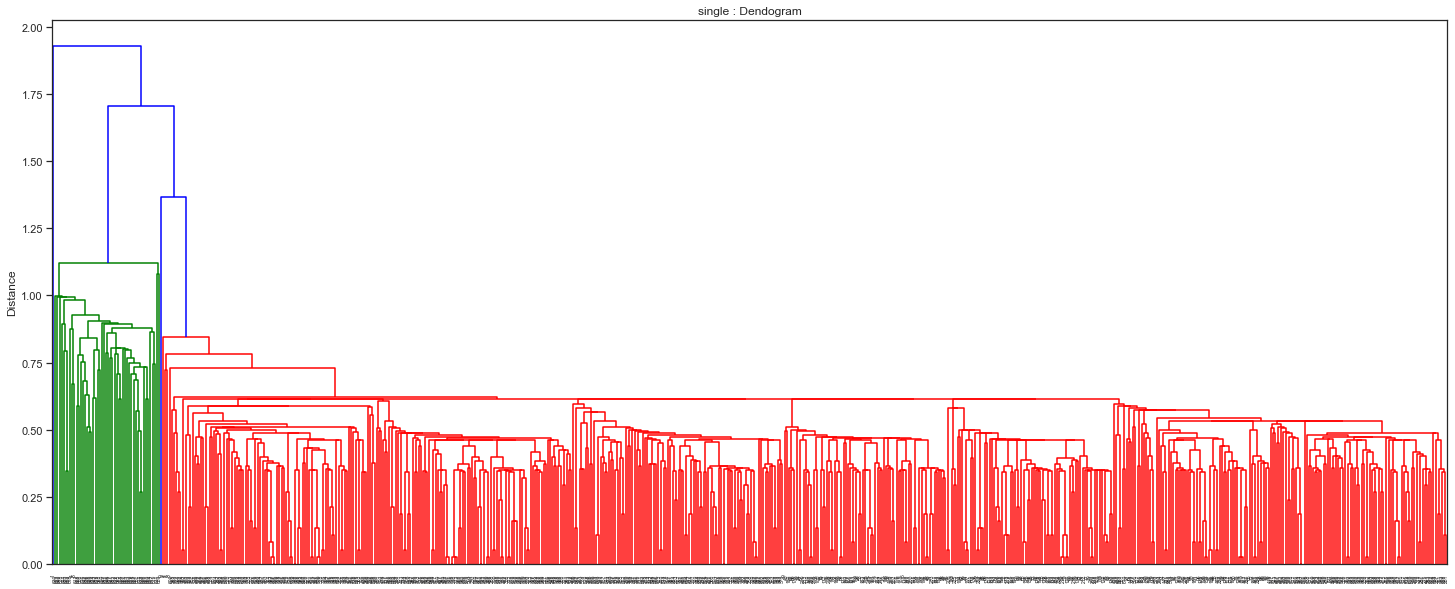


*************************************************************************************************************************************

********************************************************* Method : complete *********************************************************

Cophenetic Coeff                                 : 0.8599730607972423


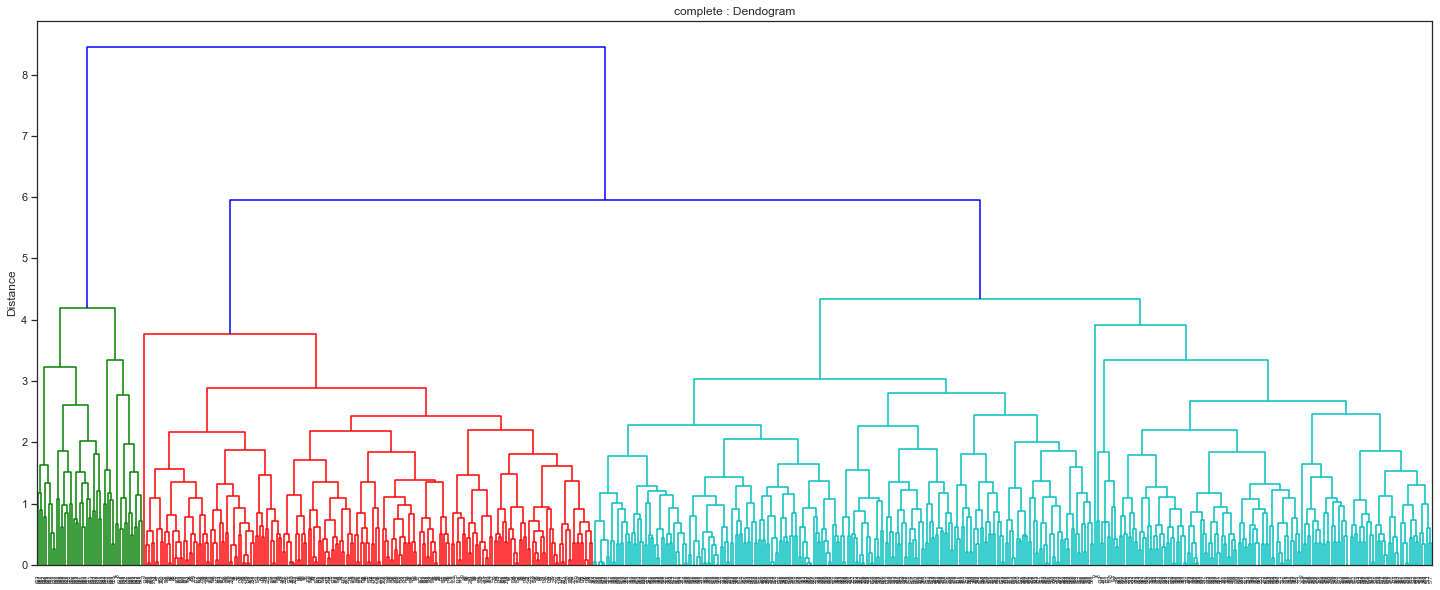


*************************************************************************************************************************************

********************************************************* Method : average *********************************************************

Cophenetic Coeff                                 : 0.8977080867389372


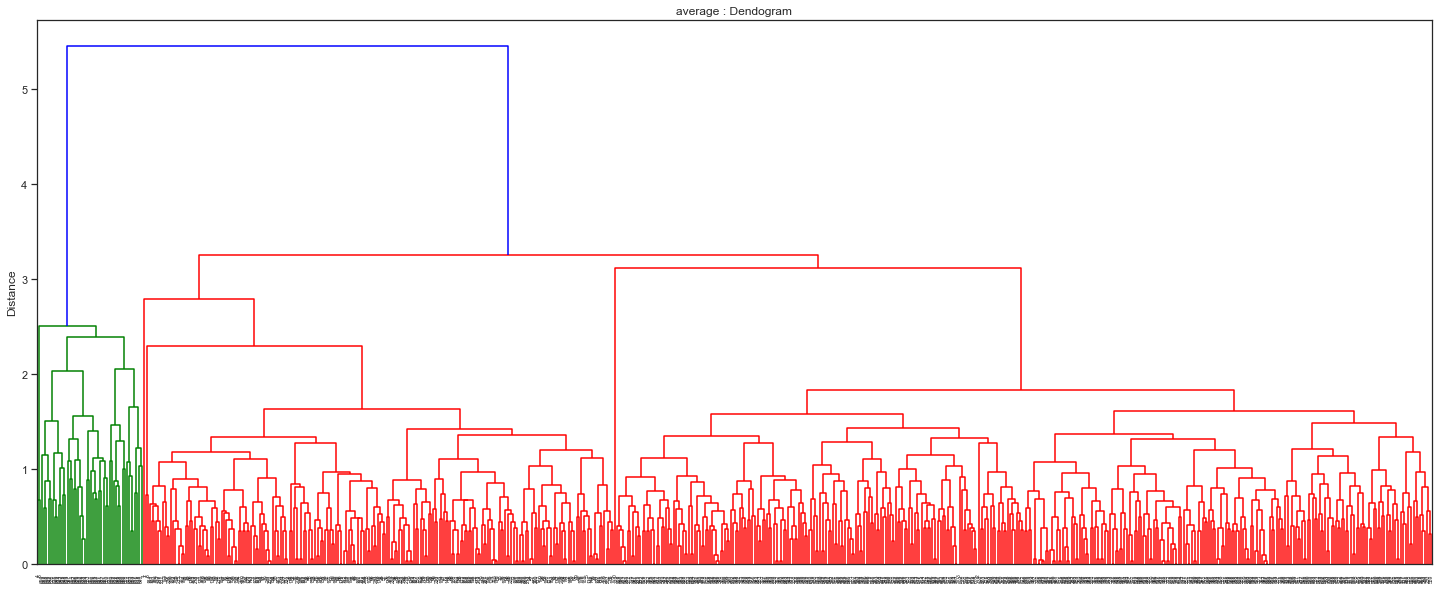


*************************************************************************************************************************************

********************************************************* Method : ward *********************************************************

Cophenetic Coeff                                 : 0.7415156284827493


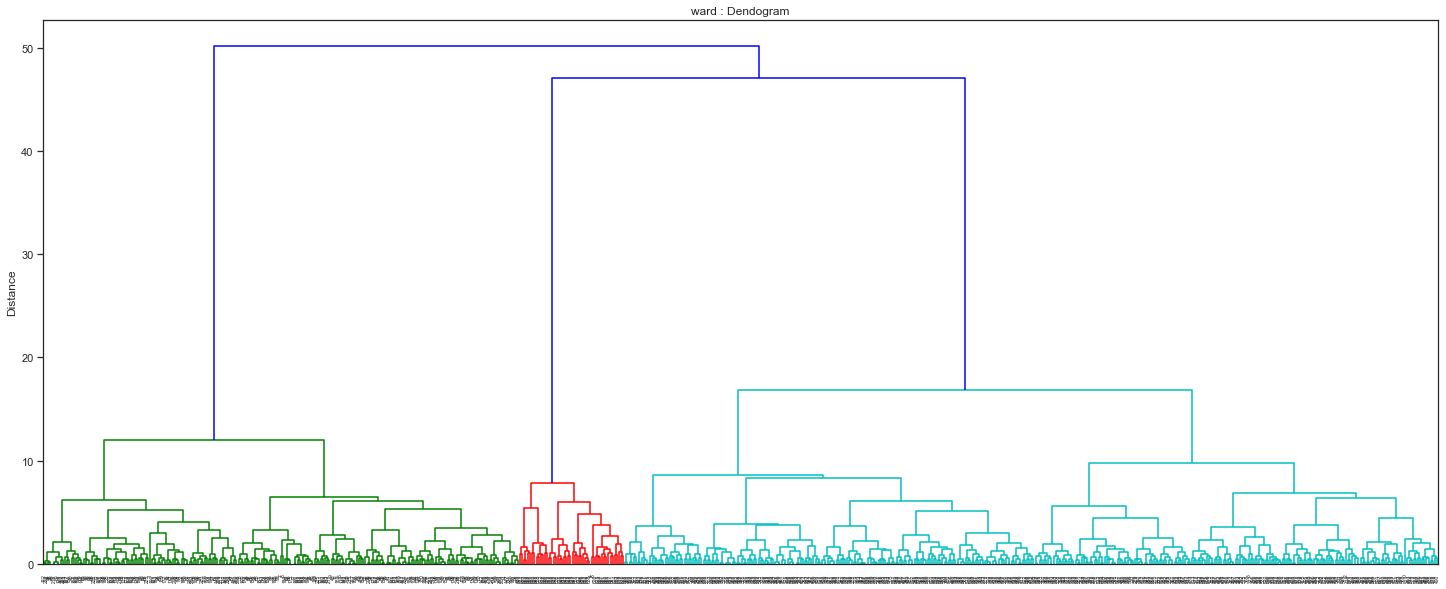


*************************************************************************************************************************************


In [28]:
# For each link method find the cophentic coeff, dendogram
# Also for each linkage type, for cluster size of 2-10, find the silhouette score and record in a separate dataframe
link_methods = ['single', 'complete', 'average', 'ward']
clusters = range(2,10)
hierarchical_results = []

for l in link_methods:
    print("")
    print("********************************************************* Method : {0} *********************************************************".format(l))
    Z = linkage(credit_card_scaled_hierarchical_df, method=l, metric='euclidean')
    cc, cophn_dist = cophenet(Z, pdist(credit_card_scaled_hierarchical_df))
    print("")
    print("Cophenetic Coeff                                 : {}".format(cc))
    plt.figure(figsize=(25, 10))
    plt.title("{0} : Dendogram".format(l))
    plt.ylabel('Distance')
    dendrogram(Z)
    plt.show();
    for cluster_size in clusters:
        agglomerative = AgglomerativeClustering(linkage=l, affinity='euclidean',n_clusters=cluster_size).fit_predict(credit_card_scaled_hierarchical_df)
        sil_score = silhouette_score(credit_card_scaled_hierarchical_df, agglomerative, metric='euclidean')
        hierarchical_results.append((l, cc, cluster_size, sil_score))
    print("")
    print("*************************************************************************************************************************************")
    
hierarchical_results_df = pd.DataFrame(hierarchical_results, columns=["Linkage Method", "Cophenetic Coeff", "Number of Cluster", "Silhouette Score"])

In [29]:
display(HTML(hierarchical_results_df.sort_values(["Cophenetic Coeff", "Silhouette Score"], ascending=False).to_html()))

##### Observation

* With highest Cophenetic Correlation Coefficient of **0.897708**, the linkage method **average** give good clustering
* From the dendogram for **average** linkage, we see **3** distinct clusters at distance **3.2**. So we will use this as a threshold for further analysis

In [30]:
# For max distance of 3.2 and linkage as average, lets see the clusters made
max_distance = 3.2
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=max_distance, affinity='euclidean',  linkage='average')
agglomerative.fit(credit_card_scaled_hierarchical_df)

AgglomerativeClustering(distance_threshold=3.2, linkage='average',
                        n_clusters=None)

In [31]:
# Check the number of data in each cluster

labels = agglomerative.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[387  50 223]


In [32]:
# Add group to original data

credit_card_hierarchical_df["Group"] = agglomerative.labels_
credit_card_scaled_hierarchical_df["Group"] = agglomerative.labels_
credit_card_hierarchical_df['Group'] = credit_card_hierarchical_df['Group'].astype('category')
credit_card_scaled_hierarchical_df['Group'] = credit_card_scaled_hierarchical_df['Group'].astype('category')

credit_card_hierarchical_df.dtypes

Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
Group                  category
dtype: object

In [33]:
# Lets look at the value counts
credit_card_hierarchical_df['Group'].value_counts()  

0    387
2    223
1     50
Name: Group, dtype: int64

In [34]:
# Check the clusters in 3d space, to get a better sense of the clustering

import plotly.express as px
fig = px.scatter_3d(credit_card_hierarchical_df, x='Total_visits_bank', y='Total_visits_online', z='Total_calls_made',color='Group', labels={"Total_visits_bank":"In Person", "Total_visits_online":"Online", "Total_calls_made":"Calls"})
fig.show();

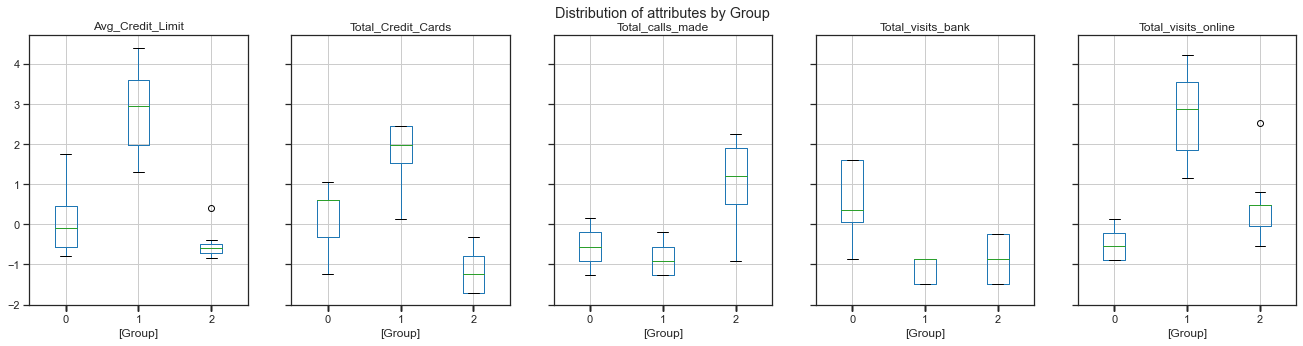

In [35]:
# Lets look at the boxplots to find the distributions of the attributes in each group

credit_card_scaled_hierarchical_df.boxplot(by = 'Group',  layout=(1,5), figsize=(22, 5))
plt.suptitle("Distribution of attributes by Group")
plt.show();

##### Observation

**Legend** : ( ⬆ - Most&nbsp;&nbsp;&nbsp;&nbsp;⇩ - Less&nbsp;&nbsp;&nbsp;&nbsp;⬇ - Least )

Customer segements are:

Customer segements are:

* **Group 0**
    * ⇩ Calls to bank
    * ⬆ Visit Bank
    * ⬇ Visit Online
    * ⇩ Average credit limit
    * ⇩ Number of credit cards

* **Group 1**
    * ⬇ Calls to bank
    * ⬇ Visit Bank
    * ⬆ Visit Online
    * ⬆ Average credit limit
    * ⬆ Number of credit cards

* **Group 2**
    * ⬆ Calls to bank
    * ⇩ Visit Bank
    * ⇩ Visit Online
    * ⬇ Average credit limit
    * ⬇ Number of credit cards

## Silhouette Scores

In [36]:
## K Mean
kmeans_silhouette_avg = silhouette_score(credit_card_scaled_kmeans_df.drop(columns=["Group"]), kmeans_predictions, metric='euclidean')

In [37]:
# Hierarchical
hierarchical_silhoutte_avg = silhouette_score(credit_card_scaled_hierarchical_df.drop(columns=["Group"]), agglomerative.labels_, metric='euclidean')

In [38]:
print("K-Means Clustering Silhouette Score       : {0}".format(kmeans_silhouette_avg))
print("Hierarchical Clustering Silhouette Score  : {0}".format(hierarchical_silhoutte_avg))

K-Means Clustering Silhouette Score       : 0.5157182558881063
Hierarchical Clustering Silhouette Score  : 0.515922432650965


##### Observation
* The silhouette scores are very similar with Hierarchical being slightly better, for the same cluster size of 3

## Cluster Comparison (K-Means and Hierarchical)

### K-Means Clustering

In [39]:
display(HTML(credit_card_kmeans_df.groupby("Group").describe().to_html()))

### Hierarchical Clustering

In [40]:
display(HTML(credit_card_hierarchical_df.groupby("Group").describe().to_html()))

##### Observation

* Both the method gave 3 clusters (groups)
* Group labeling is different
* From the boxplots in their respective sections above and the 5 point summary, we see the Groups across the methods are very similar
* As we can see, the medians for each of the attribute is the same
* The number of entries in a Group is off by 1 in two clusters, in both the methods
* The cluster with 50 entries remains the same in both the methods
* On comparing the silhouette scores
    * *K-Means Clustering* Silhouette Score       : **0.5157182558881063**
    * *Hierarchical Clustering* Silhouette Score  : **0.515922432650965**
* The silhouette values are very similar with Hierarchical being slightly better

## Cluster Analysis

Since the cluster (groups) namings are different for each method, we will pick the Grouping based on K-Means for analysis

Based on K-Means, the customer groups are:

In [41]:
display(HTML(kmeans_result_df.to_html()))

##### Observation

* **Group 0** - Have the least avg credit limit and least number of credit cards. But they call the bank most frequently. Their online visits and in person visits are less.
* **Group 1** - Have the least number of online visits and less number of calls to the bank. But they visit the bank in person most often. These customers have less avg credit limit and less number of credit cards
* **Group 2** - Have the most avg credit limit and most number of credit cards and visit the bank online most often. But they make the least calls to the bank and least visits to the bank in person

## Key Questions

1. How many different segments of customers are there?
> There are 3 segments of customers in the dataset provided
<br>
2. How are these segments different from each other?
> Based on the cluster analysis above, we can determine
>    * On a broad level, the segments are primarily based on whether the customer called the bank more often, or visited the bank most often or visited online most often
>    * Customers who most often call the bank, have the least average credit limit and least number of credit cards
>    * Customers who most often visited the bank in person, have less average credit limit and less number of credit cards
>    * Customers who most often visited the bank online, have the most average credit limit and most number of credit cards. 
<br>
3. What are your recommendations to the bank on how to better market to and service these customers?
> **For Group 0**
> <br>They have the least number of credit cards and least average credit limit. But they call the bank often. From a pure economics standpoint, this could be non beneficial to the bank. As they are spending resources on customers who dont have high avg credit limit or number of credit cards. But this could also mean the customer have very genuine issues that need to be addressed. So bank can first focus on reaching out to these customer and addressing any open issues and thus increase the customer's trust in the bank. Then for these customers, the bank can run phone campaigns to make them get more credit cards from the bank
>
> **For Group 1**
> <br>They have less number of credit cards and less average credit limit. But they visit the bank more often and have the least online visits. So for these customers, to improve bank's resource utilization, the bank can run targetted campaigns in person when they visit, to educate them on the usefulness and convenience of online visits. This will save bank on-premises resources. Customers also dont have to wait in person, in queue at the bank. Rather get service from comfort of their home. And this will improve customer satisfaction
>
> **For Group 2**
> <br>They have the most number of credit cards and high average credit limit. They also finish all their dealing with the bank online. So they are well informed and sort of gold members for the bank. So this is a good opportunity for the bank to target these customers with online campaigns for other products like home loan, term deposit etc which can potentially increase bank's revenue.